# Rainfall Prediction using Machine Learning

# DATA PREPROCESSING

In [ ]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#LOADING THE DATA
df=pd.read_csv('/content/Rainfall (2).csv')
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [ ]:
df.shape  # (rows, columns)


(366, 12)

In [ ]:
df.info()  # Shows column data types & non-null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
df.head()  # View first 5 rows


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
df.columns #show the column names

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
#changing the column names
df.rename(columns={'temparature': 'temperature', '         winddirection': 'winddirection'}, inplace=True)
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temperature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
df.duplicated().sum()  # CHECKING duplicate rows


np.int64(0)

In [ ]:
df.isnull().sum()  # Count missing values in each column


,0
day,0
pressure,0
maxtemp,0
temperature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [ ]:

# Calculate the median for 'WindDirection' and 'WindSpeed'
wind_direction_median = df['winddirection'].median()
wind_speed_median = df['windspeed'].median()

# Fill NaN values with the calculated medians
df['winddirection'].fillna(wind_direction_median, inplace=True)
df['windspeed'].fillna(wind_speed_median, inplace=True)
df.isnull().sum()


,0
day,0
pressure,0
maxtemp,0
temperature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


# EXPLORATORY DATA ANALYSIS

In [ ]:
df.describe().T ##statistical summary


,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temperature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,366.0,101.420765,81.628312,10.0,40.000,70.00,190.000,350.0


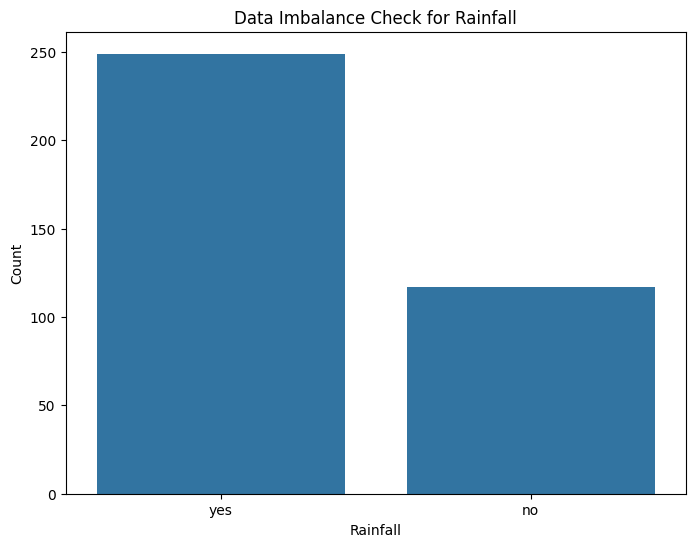

In [ ]:
#  check for data imbalance using count plot for rainfall column

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='rainfall', data=df)
plt.title('Data Imbalance Check for Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Count')
plt.show()


It is a imbalanced dataset with majority class "Rain".

<Figure size 1500x1000 with 0 Axes>

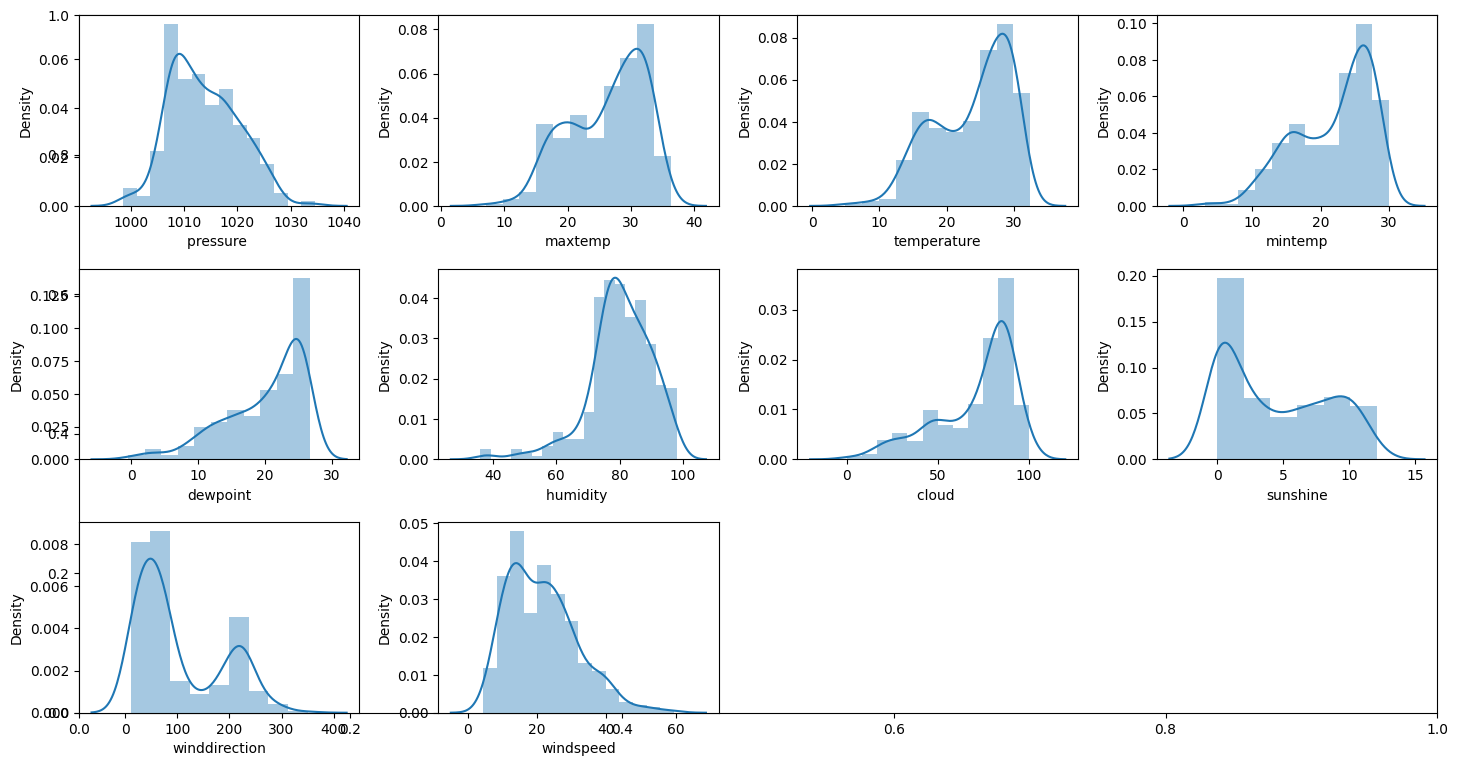

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols = numerical_cols.drop('day') #exclude day column


## Checking the distribution of the continuous numerical features
plt.figure(figsize=(15, 10))

plt.subplots(figsize=(15,8))

for i, col in enumerate(numerical_cols):
  plt.subplot(3,4, i + 1)
  sns.distplot(df[col])
plt.tight_layout()
plt.show()

These distributions suggest that most weather parameters have some degree of skewness rather than being perfectly normal. The bimodal/multimodal nature of certain variables could be due to seasonal effects or different weather patterns.

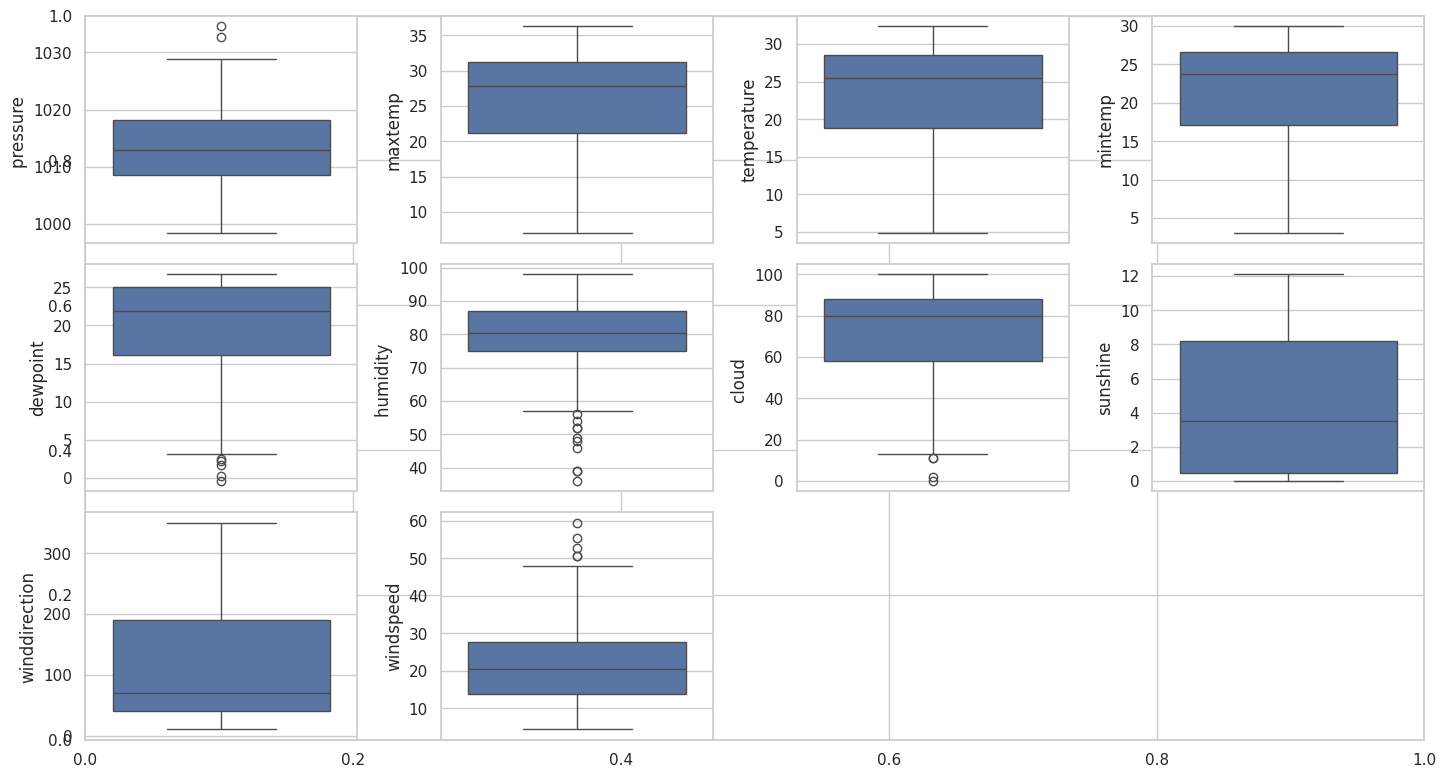

In [ ]:
#boxplot for detecting outliers
plt.subplots(figsize=(15,8))

for i, col in enumerate(numerical_cols):
  plt.subplot(3,4, i + 1)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()


Outliers are present in the dataset.But the size of the dataset being small,we cannot remove them.

In [ ]:
# label encoding for the rainfall  column

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['rainfall'] = le.fit_transform(df['rainfall'])


In [ ]:
df.head()

,day,pressure,maxtemp,temperature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


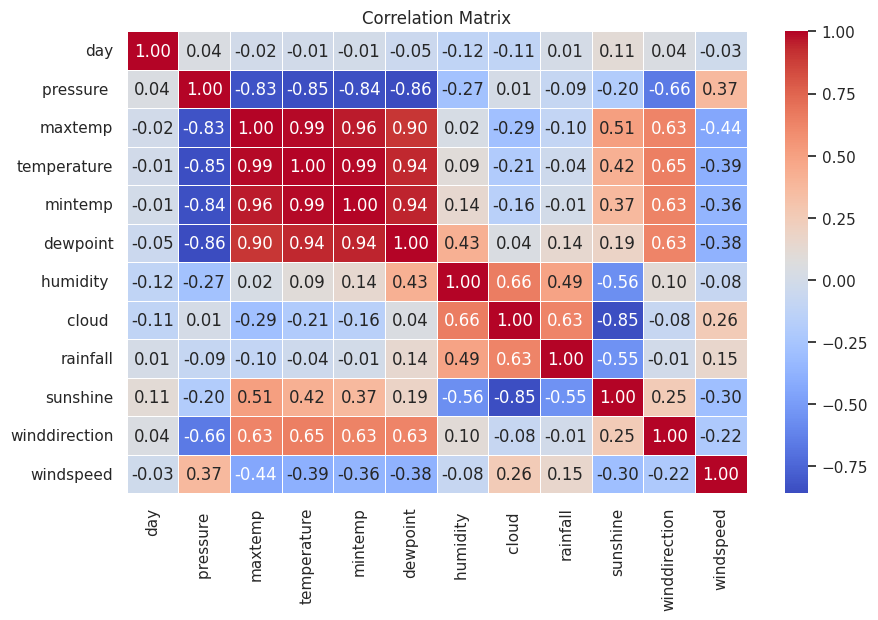

In [ ]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Maxtemp,mintemp,dewpoint and temperature are highly correlated.temperature and dewpoint provide distinct information regarding the weather and atmospheric conditions,that's why we do not remove those columns.We can drop columns Maxtemp and Mintemp and add a new column using these features as temp diff= maxtemp-mintemp.

# FEATURE ENGINEERING

In [ ]:
# add a column as temp diff = maxtemp - mintemp
df['temp_diff'] = df['maxtemp'] - df['mintemp']


In [ ]:
#  drop the columns maxtemp and mintemp
df = df.drop(['maxtemp', 'mintemp'], axis=1)


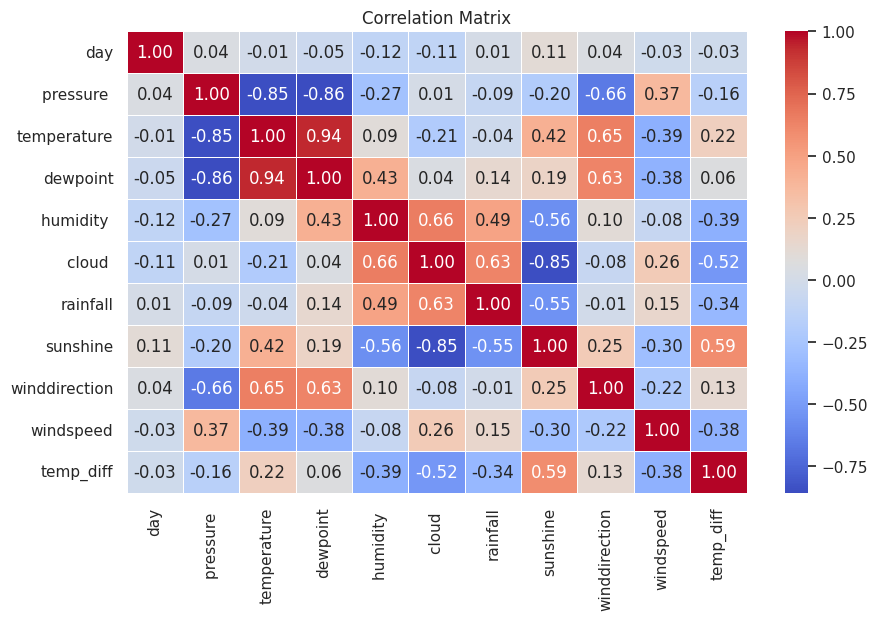

In [ ]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# split the dataset in x and y where y contains rainfall column and x contains other predictors

x = df.drop(['day','rainfall'], axis=1)
y = df['rainfall']


In [ ]:
x

,pressure,temperature,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,temp_diff
0,1025.9,18.3,13.1,72,49,9.3,80.0,26.3,3.1
1,1022.0,18.9,15.6,81,83,0.6,50.0,15.3,4.5
2,1019.7,19.3,18.4,95,91,0.0,40.0,14.2,2.3
3,1018.9,20.6,18.8,90,88,1.0,50.0,16.9,3.2
4,1015.9,20.7,19.9,95,81,0.0,40.0,13.7,1.1
...,...,...,...,...,...,...,...,...,...
361,1022.7,17.7,15.0,84,90,0.0,30.0,18.4,1.9
362,1026.6,17.3,12.8,75,85,1.0,20.0,25.9,2.3
363,1025.9,17.7,13.3,75,78,4.6,70.0,33.4,2.5
364,1025.3,17.3,13.3,78,86,1.2,20.0,20.9,4.0


In [ ]:
y

,rainfall
0,1
1,1
2,1
3,1
4,1
...,...
361,1
362,1
363,1
364,1


In [ ]:
#train and test splitiing in 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(366, 9) (292, 9) (74, 9)
(366,) (292,) (74,)


In [ ]:
# balancing the imbalanced dataset by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
x, y = ros.fit_resample(x_train, y_train)

# FEATURE SCALING

In [ ]:
# Standard Scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_test = scaler.transform(x_test)


# MODEL TRAINING

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='auc')
}

# Train models and evaluate ROC-AUC scores
results = []
for name, model in models.items():
    # Train the model
    model.fit(x,y)

    # Predict probabilities for ROC-AUC Score
    y_train_pred = model.predict_proba(x)[:, 1]
    y_test_pred = model.predict_proba(x_test)[:, 1]

    # Calculate ROC-AUC scores
    train_auc = roc_auc_score(y, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)

    results.append([name, train_auc, test_auc])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Training ROC-AUC", "Validation ROC-AUC"])

# Display results
print(results_df)

                    Model  Training ROC-AUC  Validation ROC-AUC
0     Logistic Regression          0.890154            0.895833
1           Random Forest          1.000000            0.882083
2  Support Vector Machine          0.911896            0.889167
3                 XGBoost          1.000000            0.845000


Support vector classifier is a satisfactory model to fit as the gap between the training and the validation accuracy is low and gives high training and validation accuracy among all the models.

In [ ]:

# Initialize the SVC model
svc_model = SVC(probability=True)

# Train the SVC model
svc_model.fit(x, y)

# Make predictions on the test set
y_pred = svc_model.predict(x_test)


# MODEL EVALUATION

In [ ]:

# comparison between test value and predicted value
results_comparison = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
results_comparison


,y_test,y_pred
269,1,1
243,1,1
149,1,1
331,0,0
254,1,0
...,...,...
23,1,1
202,1,0
353,0,0
191,1,1


In [ ]:
from sklearn.metrics import confusion_matrix

# Assume y_test (actual labels) and y_pred (predicted labels)
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[17  7]
 [ 3 47]]


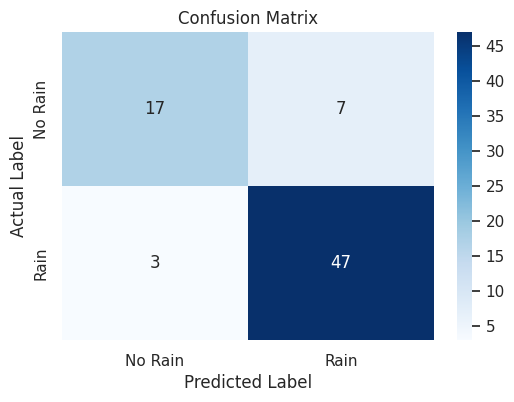

In [ ]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#  classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.87      0.94      0.90        50

    accuracy                           0.86        74
   macro avg       0.86      0.82      0.84        74
weighted avg       0.86      0.86      0.86        74

